Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


<ipython-input-1-1196308b4f10>:38: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[y == i, 0], X[y == i, 1], label=target_name, cmap=cmap, edgecolor='black', s=50)


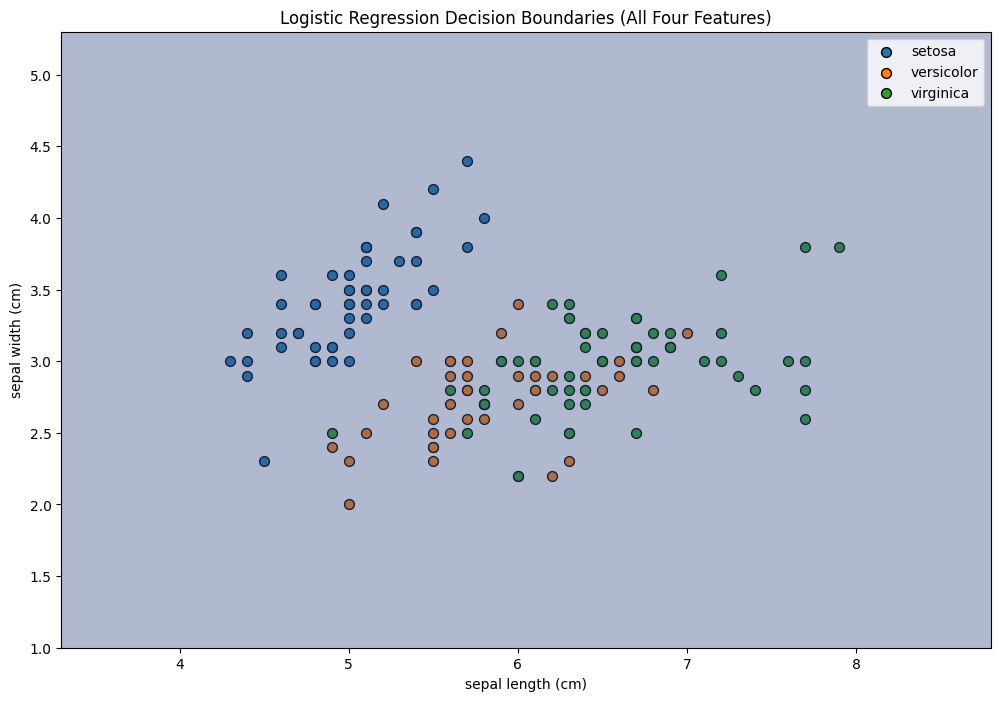

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Load the Iris dataset
data = load_iris()
X = data.data
y = data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Logistic Regression model for multi-class classification
model = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=1000)

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Print classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Plot decision boundaries for all four features
plt.figure(figsize=(12, 8))
cmap = plt.get_cmap('viridis')

for i, target_name in enumerate(data.target_names):
    plt.scatter(X[y == i, 0], X[y == i, 1], label=target_name, cmap=cmap, edgecolor='black', s=50)

# Create meshgrid for all four features
xx, yy = np.meshgrid(np.arange(X[:, 0].min() - 1, X[:, 0].max() + 1, 0.1),
                     np.arange(X[:, 1].min() - 1, X[:, 1].max() + 1, 0.1))

# Predict on the meshgrid
meshgrid_data = np.c_[xx.ravel(), yy.ravel(), np.zeros(xx.ravel().shape), np.zeros(xx.ravel().shape)]
Z = model.predict(meshgrid_data)
Z = Z.reshape(xx.shape)

# Plot decision boundaries for all four features
plt.contourf(xx, yy, Z, alpha=0.4, cmap=cmap)

plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.title("Logistic Regression Decision Boundaries (All Four Features)")
plt.legend(loc='upper right')

# Show the plot
plt.show()